### Boston Housing Price - Linear Regression

#### Linear Regression

What is Linear Regression?

Regression is a parametric technique used to predict continuous (dependent) variable given a set of independent variables.

$ Y = βo + β1X + ∈ $


    1. Y   -  This is the variable we predict
    2. X   -  This is the variable we use to make a prediction
    3. βo  -  This is the intercept term. It is the prediction value you get when X = 0
    4. β1  -  This is the slope term. It explains the change in Y when X changes by 1 unit. ∈ - This represents the residual   value, i.e. the difference between actual and predicted values.
                                                                                                                                 

#### Formula for calculating the coefficients

$β1 = Σ(xi - xmean)(yi-ymean)/ Σ (xi - xmean)²$         where i= 1 to n (no. of obs.)


$βo = ymean - β1(xmean)$

#### Error reduction Techniques
    
        a. Ordinary Least Square - ∑[Actual(y) - Predicted(y')]²              
        b. Generalized Least Square
        c. Percentage Least Square
        d. Total Least Square
        e. Least absolute deviation
        
#### Why OLS?

i. It uses squared error which has nice mathematical properties, thereby making it easier to differentiate and compute gradient descent

ii.OLS is easy to analyze and computationally faster, i.e. it can be quickly applied to data sets having 1000s of features

iii.Interpretation of OLS is much easier than other regression techniques

## Case Study : Predicting Housing Price

In [4]:
# Case Study : Predicting Housing Price

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
# Importing Boston housing data
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [37]:
X = boston.data
y = boston.target

features= pd.DataFrame(X,columns=boston.feature_names)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Validating the assumptions made in regression 
    
    1. There exists a linear and additive relationship between dependent (DV) and independent variables (IV)
    2. Multicollinearity - present of correlation b/w independent variables
    3. Heteroskedestacity- Absence of constant variance in the error terms  
    4. Autocorrelation - Presences of correlation in error terms
    5. The dependent variable and the error terms should possess a normal distribution

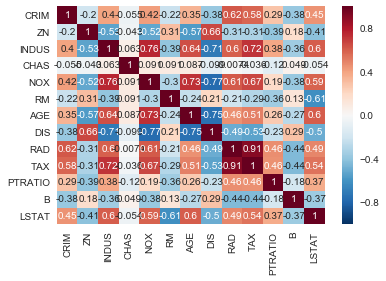

In [85]:
# For simplicity purpose we can use only the variables which are numeric(Excluding Address variable ) 
# Validating assumption 2 
# Multicollinearity - present of correlation b/w independent variables
# The dependent variable and the error terms should possess a normal distribution

#sns.pairplot(features)
sns.heatmap(features.corr(),annot=True)
# Findings: 1. For simplicity assumption Multicollinearity is not present

# Variance Inflation Factor (VIF) - This metric is used to check multicollinearity. 
# VIF <=4 implies no multicollinearity but VIF >=10 suggests high multicollinearity. 
# Alternatively, you can also look at the tolerance (1/VIF) value to determine correlation in IVs. 
# In addition, you can also create a correlation matrix to determine collinear variables.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


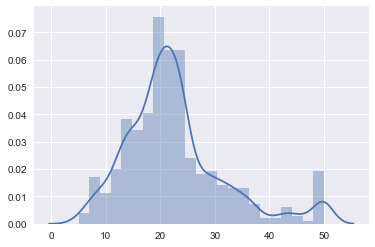

In [43]:
# Validating assumption 5 
# The dependent variable and the error terms should possess a normal distribution

sns.distplot(y)

# Findings: 1. The dependent variable is normally distributed


#### How can you improve the accuracy of a regression model ?

There is little you can do when your data violates regression assumptions. An obvious solution is to use tree-based algorithms which capture non-linearity quite well. But if you are adamant at using regression, following are some tips you can implement:

    1. If your data is suffering from non-linearity, transform the IVs using sqrt, log, square, etc.
    
    2.If your data is suffering from heteroskedasticity, transform the DV using sqrt, log, square, etc. Also, you can use weighted least square method to tackle this problem.
    
    3. If your data is suffering from multicollinearity, use a correlation matrix to check correlated variables. Let's say variables A and B are highly correlated. Now, instead of removing one of them, use this approach: Find the average correlation of A and B with the rest of the variables. Whichever variable has the higher average in comparison with other variables, remove it. Alternatively, you can use penalized regression methods such as lasso, ridge, elastic net, etc.
    
    4.You can do variable selection based on p values. If a variable shows p value > 0.05, we can remove that variable from model since at p> 0.05, we'll always fail to reject null hypothesis.

In [92]:
# Splitting the dataset into training & test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

404
102
404
102


In [93]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
fit= lm.fit(X_train,y_train)
print('% Response variable variation explained by linear model :',fit.score(X_train,y_train) * 100)

% Response variable variation explained by linear model : 72.8581829267


In [ ]:
'''
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
predictions = model.predict(X_test)

# Print out the statistics
model.summary()

# 1. Residual vs. Fitted Values Plot to check heteroskedasticity -If any pattern exist then heteroskedasticity exist else no
# 2. Breusch-Pagan / Cook Weisberg Test - This test is used to determine presence of heteroskedasticity. 
#    If you find p < 0.05, you reject the null hypothesis and infer that heteroskedasticity is present.

# 2. Durbin Watson Statistic (DW)  - This test is used to check autocorrelation. Its value lies between 0 and 4. 
#    A DW=2 value shows no autocorrelation. However, a value between 0 < DW < 2 implies positive autocorrelation, while 2 < DW < 4 implies negative autocorrelation.
# Findings : We dont have Autocorrelation
'''

In [96]:
## Predictions
from sklearn import metrics
predictions = lm.predict(X_test)

print('Predicted R2 determines how well the model predicts responses for new observations :',metrics.r2_score(y_test,predictions)*100)

Predicted R2 determines how well the model predicts responses for new observations : 77.8720987477


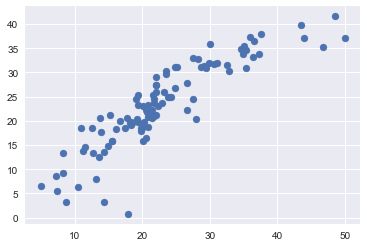

In [97]:
# Scatter plot to determine how well the model predicts responses from new observations 
plt.scatter(y_test,predictions)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


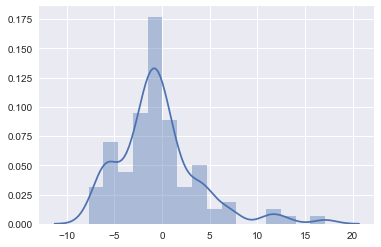

In [98]:
# Checking whether the error terms possess a normal distribution
import seaborn as sns
sns.distplot((y_test-predictions))

# Findings: Yes, the erroe term is normally distributed

### Evaluation Metrics


In [99]:
from sklearn import metrics
print('MAE = ', metrics.mean_absolute_error(y_test,predictions))
print('MSE = ',metrics.mean_squared_error(y_test,predictions))
print('RMSE = ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

# Error metric is the crucial evaluation number we must check. Since all these are errors, lower the number, better the model.
# Findings: From the below metrics, the model is performing pretty good.

MAE =  3.11306137942
MSE =  18.5121317884
RMSE =  4.30257269415


                        Great we have completed it ! Any ways to improve the model?